In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [170]:
file = pd.read_csv("docweb.csv")

In [171]:
file

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866
4568,71,20.610685,6.545573,Nano,249.101915
4569,44,19.800072,5.096192,Micro,163.631457
4570,71,17.534640,1.940873,Macro,253.610411


In [172]:
x = file['TV'][0:500]

In [173]:
y = file['Sales'][0:500]

Text(0, 0.5, 'Sales')

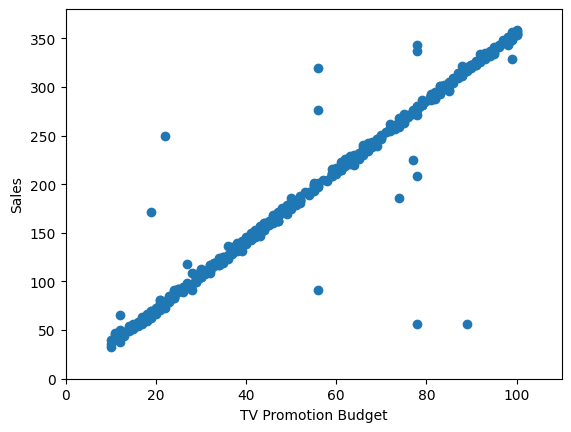

In [174]:
plt.scatter(x,y)
plt.xlabel('TV Promotion Budget')
plt.xlim(0,110)
plt.ylim(0,380)
plt.ylabel('Sales')

# Extract Sales = f(TV Budget)

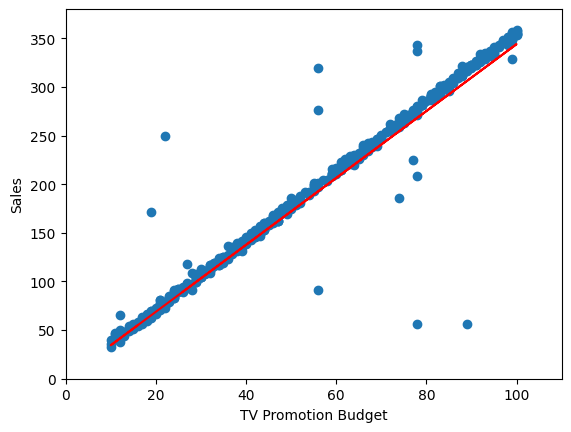

In [175]:
plt.scatter(x,y)
plt.xlabel('TV Promotion Budget')
plt.xlim(0,110)
plt.ylim(0,380)
plt.ylabel('Sales')
plt.plot(x,3.44*x,color='red',label='y=0.5x')

# Extract Sales = f(TV Budget)

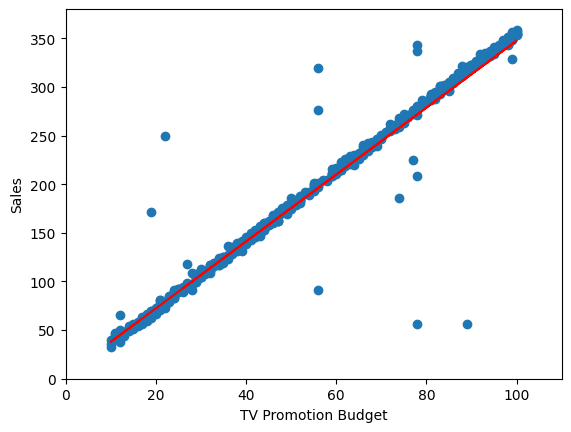

In [176]:
plt.scatter(x,y)
plt.xlabel('TV Promotion Budget')
plt.xlim(0,110)
plt.ylim(0,380)
plt.ylabel('Sales')
plt.plot(x,3.44*x+3.5,color='red',label='y=0.5x')

# Extract Sales = f(TV Budget)
# Sales = 3.44*TV Budget + 3.5

In [177]:
data1 = file['Radio'][0:500]
data2 = file['Sales'][0:500]

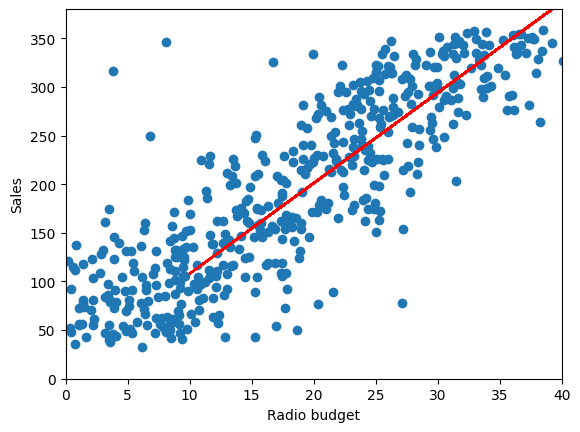

In [178]:
plt.scatter(data1,data2)
plt.ylabel('Sales')
plt.xlim(0,40)
plt.ylim(0,380)
plt.xlabel('Radio budget')
plt.plot(x,9.3*x+15,color='red')

In [179]:
data3 = file['Social Media'][0:500]
data4 = file['Sales'][0:500]

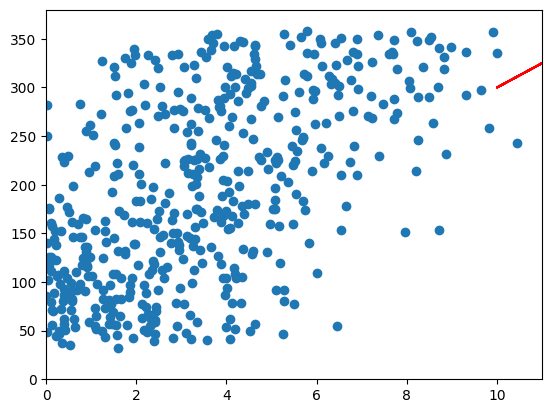

In [180]:
# SM vs Sales
plt.scatter(data3,data4)
plt.xlim(0,11)
plt.ylim(0,380)
plt.plot(x,25*x+50,color='red')

In [181]:
# ------------- SK LEARN ----------------

In [182]:
x_train, x_test, y_train, y_test = train_test_split(file['TV'], file['Sales'], test_size=0.2, random_state=42)

In [183]:
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [184]:
cls = linear_model.LinearRegression()

In [185]:
cls.fit(x_train,y_train)

LinearRegression()

In [186]:
prediction = cls.predict(x_test)
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [187]:
slope = cls.coef_
print(slope)

[[3.55065029]]


In [188]:
inctercept = cls.intercept_
print(inctercept)

[0.42797622]


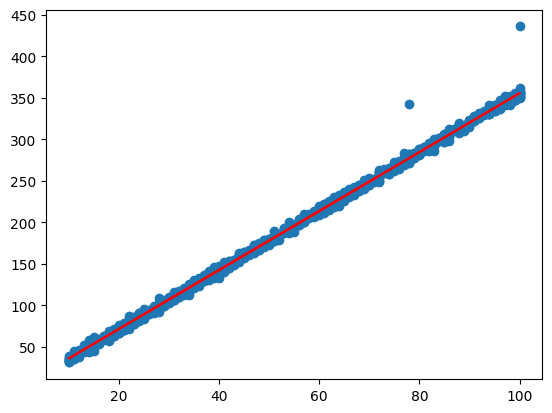

In [189]:
plt.scatter(x_test,y_test)
plt.plot(x_test,prediction,color='Red')
# Sales = (slope*TV + inctercept)*error1 + 

In [190]:
error1 = metrics.r2_score(y_test,prediction)
print(error1)

0.9975083398581528


In [191]:
x_train, x_test, y_train, y_test = train_test_split(file['Radio'], file['Sales'], test_size=0.23, random_state=76)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

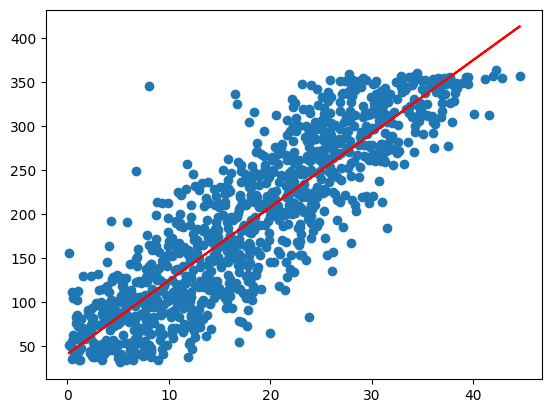

In [192]:
cls = linear_model.LinearRegression()
cls.fit(x_train,y_train)
prediction = cls.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,prediction,color='Red')

In [193]:
error2 = metrics.r2_score(y_test,prediction)

In [194]:
error2

0.7593856944904541

In [195]:
slope2 = cls.coef_
intercept2 = cls.intercept_

In [196]:
df = pd.read_csv("docweb.csv")

In [197]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866
4568,71,20.610685,6.545573,Nano,249.101915
4569,44,19.800072,5.096192,Micro,163.631457
4570,71,17.534640,1.940873,Macro,253.610411


In [198]:
label_encoder = LabelEncoder()

In [199]:
df['Influencer_encoded'] = label_encoder.fit_transform(df['Influencer'])

In [200]:
df[0:10]

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded
0,16,6.566231,2.907983,Mega,54.732757,1
1,13,9.237765,2.409567,Mega,46.677897,1
2,41,15.886446,2.913410,Mega,150.177829,1
3,83,30.020028,6.922304,Mega,298.246340,1
4,15,8.437408,1.405998,Micro,56.594181,2
5,29,9.614382,1.027163,Mega,105.889148,1
6,55,24.893811,4.273602,Micro,198.679825,2
7,31,17.355042,2.289855,Nano,108.733932,3
8,76,24.648898,7.130116,Macro,270.189400,0
9,13,0.431128,2.229423,Mega,48.280582,1


In [201]:
category_mapping = {
    'Mega' : 3, 
    'Macro': 2, 
    'Micro': 1,
    'Nano': 0.5
}

In [213]:
df['Influencer_encoded'] = df['Influencer'].map(category_mapping)
scaler = StandardScaler()
df['Influencer_encoded'] = scaler.fit_transform(df['Influencer_encoded'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [203]:
df

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded
0,16,6.566231,2.907983,Mega,54.732757,3.0
1,13,9.237765,2.409567,Mega,46.677897,3.0
2,41,15.886446,2.913410,Mega,150.177829,3.0
3,83,30.020028,6.922304,Mega,298.246340,3.0
4,15,8.437408,1.405998,Micro,56.594181,1.0
...,...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866,1.0
4568,71,20.610685,6.545573,Nano,249.101915,0.5
4569,44,19.800072,5.096192,Micro,163.631457,1.0
4570,71,17.534640,1.940873,Macro,253.610411,2.0


In [215]:
X = df[['TV','Radio','Social Media','Influencer_encoded']]
print(len(X))

4572


In [217]:
Y = df['Sales']
print(len(Y))

4572


In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [207]:
df['Sales']

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4572, dtype: float64

In [208]:
df['TV']

0       16
1       13
2       41
3       83
4       15
        ..
4567    26
4568    71
4569    44
4570    71
4571    42
Name: TV, Length: 4572, dtype: int64

In [209]:
X_train = np.reshape(X_train,(-1,1))
X_test = np.reshape(X_test,(-1,1))
Y_train = np.reshape(Y_train,(-1,1))
Y_test = np.reshape(Y_test,(-1,1))

In [210]:
cls = linear_model.LinearRegression()

In [219]:
X_train.shape

(13716, 1)

In [220]:
Y_train.shape

(3429, 1)

In [221]:
df['Influencer_encoded'].index.equals(df['Sales'])

False

In [222]:
df['Aligned'] = df['Influencer_encoded'].reindex(df['Sales'].index)

In [223]:
df

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded,Aligned
0,16,6.566231,2.907983,Mega,54.732757,3.0,3.0
1,13,9.237765,2.409567,Mega,46.677897,3.0,3.0
2,41,15.886446,2.913410,Mega,150.177829,3.0,3.0
3,83,30.020028,6.922304,Mega,298.246340,3.0,3.0
4,15,8.437408,1.405998,Micro,56.594181,1.0,1.0
...,...,...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866,1.0,1.0
4568,71,20.610685,6.545573,Nano,249.101915,0.5,0.5
4569,44,19.800072,5.096192,Micro,163.631457,1.0,1.0
4570,71,17.534640,1.940873,Macro,253.610411,2.0,2.0


In [224]:
df['Aligned'].index.equals(df['Sales'])

False

In [232]:
X = df[['TV','Radio','Social Media','Aligned']]
len(X)

4572

In [233]:
Y = df['Sales']
len(Y)

4572

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [237]:
X_train = np.reshape(X_train,(-1,1))
X_test = np.reshape(X_test,(-1,1))
Y_train = np.reshape(Y_train,(-1,1))
Y_test = np.reshape(Y_test,(-1,1))

In [229]:
cls = linear_model.LinearRegression()

In [241]:
df_d = df.drop('Influencer',axis=1)

In [242]:
df_d

,TV,Radio,Social Media,Sales,Influencer_encoded,Aligned
0,16,6.566231,2.907983,54.732757,3.0,3.0
1,13,9.237765,2.409567,46.677897,3.0,3.0
2,41,15.886446,2.913410,150.177829,3.0,3.0
3,83,30.020028,6.922304,298.246340,3.0,3.0
4,15,8.437408,1.405998,56.594181,1.0,1.0
...,...,...,...,...,...,...
4567,26,4.472360,0.717090,94.685866,1.0,1.0
4568,71,20.610685,6.545573,249.101915,0.5,0.5
4569,44,19.800072,5.096192,163.631457,1.0,1.0
4570,71,17.534640,1.940873,253.610411,2.0,2.0


In [243]:
X = df_d[['TV','Radio','Social Media']]

In [245]:
Y = df_d['Sales']

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [247]:
X_train = np.reshape(X_train,(-1,1))
X_test = np.reshape(X_test,(-1,1))
Y_train = np.reshape(Y_train,(-1,1))
Y_test = np.reshape(Y_test,(-1,1))

In [248]:
cls = linear_model.LinearRegression()

In [250]:
df

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded,Aligned
0,16,6.566231,2.907983,Mega,54.732757,3.0,3.0
1,13,9.237765,2.409567,Mega,46.677897,3.0,3.0
2,41,15.886446,2.913410,Mega,150.177829,3.0,3.0
3,83,30.020028,6.922304,Mega,298.246340,3.0,3.0
4,15,8.437408,1.405998,Micro,56.594181,1.0,1.0
...,...,...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866,1.0,1.0
4568,71,20.610685,6.545573,Nano,249.101915,0.5,0.5
4569,44,19.800072,5.096192,Micro,163.631457,1.0,1.0
4570,71,17.534640,1.940873,Macro,253.610411,2.0,2.0


In [279]:
X = df.drop(['Sales','Influencer','Influencer_encoded'],axis=1)

In [280]:
Y = df['Sales']

In [281]:
df

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded,Aligned
0,16,6.566231,2.907983,Mega,54.732757,3.0,3.0
1,13,9.237765,2.409567,Mega,46.677897,3.0,3.0
2,41,15.886446,2.913410,Mega,150.177829,3.0,3.0
3,83,30.020028,6.922304,Mega,298.246340,3.0,3.0
4,15,8.437408,1.405998,Micro,56.594181,1.0,1.0
...,...,...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866,1.0,1.0
4568,71,20.610685,6.545573,Nano,249.101915,0.5,0.5
4569,44,19.800072,5.096192,Micro,163.631457,1.0,1.0
4570,71,17.534640,1.940873,Macro,253.610411,2.0,2.0


In [282]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [283]:
X_train = np.reshape(X_train,(-1,1))
X_test = np.reshape(X_test,(-1,1))
Y_train = np.reshape(Y_train,(-1,1))
Y_test = np.reshape(Y_test,(-1,1))

In [284]:
cls = linear_model.LinearRegression()

In [ ]:
# ----------- FRESH ----------

In [286]:
df = pd.read_csv('data.csv')

In [287]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [288]:
df_filtered = df.dropna()

In [289]:
df_filtered

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [292]:
category_mapping = {
    'Mega':3.5,
    'Macro':2.5,
    'Micro':1.5,
    'Nano':0.5
}

In [293]:
df['Influencer_encoded'] = df['Influencer'].map(category_mapping)

In [294]:
df

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded
0,16.0,6.566231,2.907983,Mega,54.732757,3.5
1,13.0,9.237765,2.409567,Mega,46.677897,3.5
2,41.0,15.886446,2.913410,Mega,150.177829,3.5
3,83.0,30.020028,6.922304,Mega,298.246340,3.5
4,15.0,8.437408,1.405998,Micro,56.594181,1.5
...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866,1.5
4568,71.0,20.610685,6.545573,Nano,249.101915,0.5
4569,44.0,19.800072,5.096192,Micro,163.631457,1.5
4570,71.0,17.534640,1.940873,Macro,253.610411,2.5


In [296]:
df.to_csv('output_csv.csv',index=True)

In [297]:
df

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded
0,16.0,6.566231,2.907983,Mega,54.732757,3.5
1,13.0,9.237765,2.409567,Mega,46.677897,3.5
2,41.0,15.886446,2.913410,Mega,150.177829,3.5
3,83.0,30.020028,6.922304,Mega,298.246340,3.5
4,15.0,8.437408,1.405998,Micro,56.594181,1.5
...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866,1.5
4568,71.0,20.610685,6.545573,Nano,249.101915,0.5
4569,44.0,19.800072,5.096192,Micro,163.631457,1.5
4570,71.0,17.534640,1.940873,Macro,253.610411,2.5


In [298]:
t = pd.read_csv("data.csv")

In [299]:
t

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [300]:
category_mapping = {
    'Mega' : 3, 
    'Macro': 2, 
    'Micro': 1,
    'Nano': 0.5
}

In [301]:
t['Influencer_encoded'] = t['Influencer'].map(category_mapping)

In [302]:
t

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded
0,16.0,6.566231,2.907983,Mega,54.732757,3.0
1,13.0,9.237765,2.409567,Mega,46.677897,3.0
2,41.0,15.886446,2.913410,Mega,150.177829,3.0
3,83.0,30.020028,6.922304,Mega,298.246340,3.0
4,15.0,8.437408,1.405998,Micro,56.594181,1.0
...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866,1.0
4568,71.0,20.610685,6.545573,Nano,249.101915,0.5
4569,44.0,19.800072,5.096192,Micro,163.631457,1.0
4570,71.0,17.534640,1.940873,Macro,253.610411,2.0
